In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [3]:

# Charger dataset 
df = pd.read_csv("../data/water_potability.csv")
# Vérifier les 5 premières lignes
df.head()
# Taille du dataset
print("Shape:", df.shape)
# Types de données et valeurs manquantes
df.info()
# Statistiques de base
df.describe()



Shape: (3276, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [4]:
# Count les val manquantes par colonne
df.isnull().sum()


ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

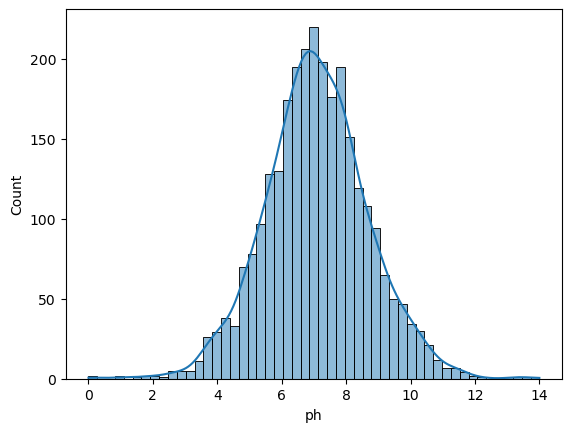

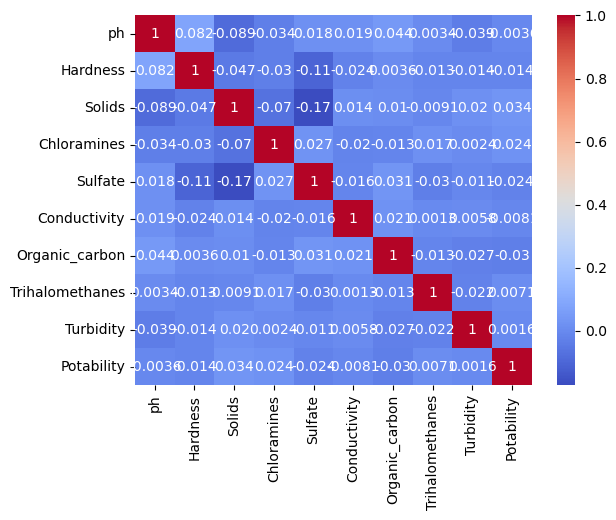

In [5]:

# Distribution de pH
sns.histplot(df['ph'], kde=True)
plt.show()

# Heatmap pour voir corrélation
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()


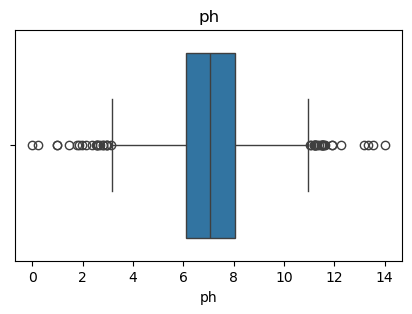

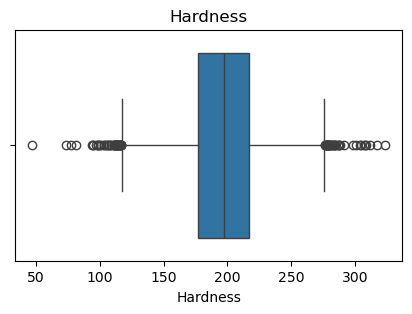

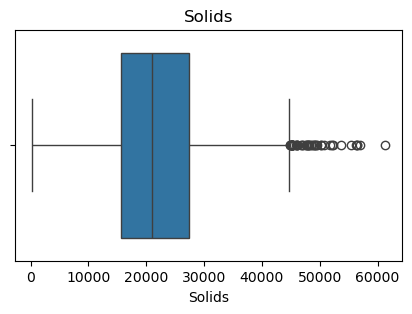

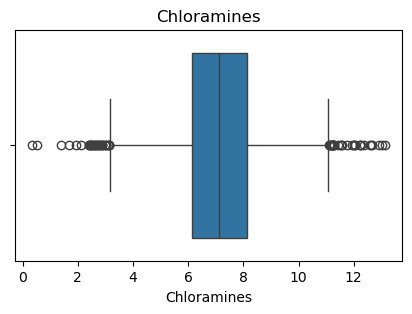

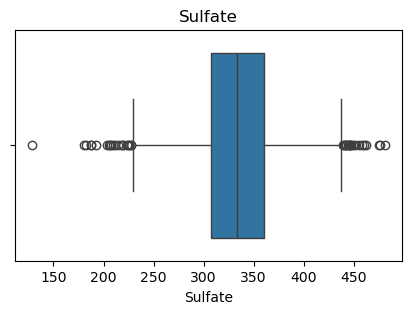

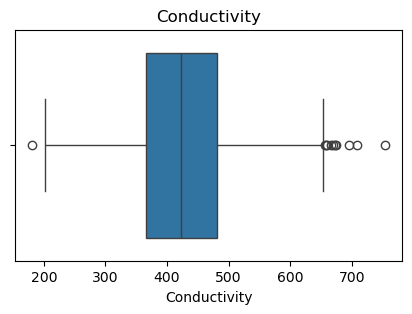

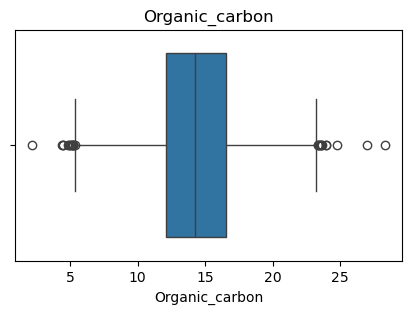

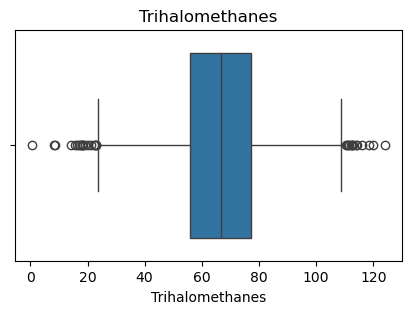

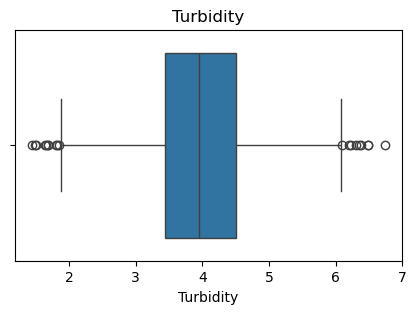

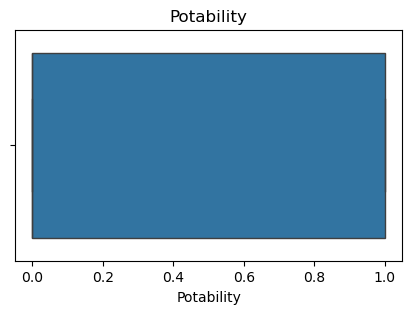

In [7]:
# this is etape 2 normalement or actually we could include it dans etape 1 ( a savoir apres )
# visualisation des outiliers 
for col in df.columns:
    plt.figure(figsize=(5,3))
    sns.boxplot(x=df[col])
    plt.title(col)
    plt.show()


In [9]:
# hana on est entraine de faire le traitement de val manquantes on remplace sulfate et ph par mediane then trihalm.. par la moyenne 
df.fillna({
    'ph': df['ph'].median(),
    'Sulfate': df['Sulfate'].median(),
    'Trihalomethanes': df['Trihalomethanes'].mean()
}, inplace=True)


In [13]:
# checking for les val manquantes  le count est full 3276 are full 
df.describe()



,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000
mean,7.074194,196.369496,22014.092526,7.122277,333.608364,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.470040,32.879761,8768.570828,1.583085,36.143851,80.824064,3.308162,15.769881,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.277673,176.850538,15666.690297,6.127421,317.094638,365.734414,12.065801,56.647656,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.396293,3.955028,0.000000
75%,7.870050,216.667456,27332.762127,8.114887,350.385756,481.792304,16.557652,76.666609,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [14]:
# another check to see ida mzel les val manquantes et voiiiila on a pas tt est a zero
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [15]:
# now detection des outiliers  hna 3ndna les val numeriques mo9bil drna hdek boxplot actually are the same 
def detect_outliers_iqr(column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower) | (df[column] > upper)]
    return outliers.shape[0]

for col in df.columns[:-1]:  # exclure Potability
    print(col, ":", detect_outliers_iqr(col), "outliers")


ph : 142 outliers
Hardness : 83 outliers
Solids : 47 outliers
Chloramines : 61 outliers
Sulfate : 264 outliers
Conductivity : 11 outliers
Organic_carbon : 25 outliers
Trihalomethanes : 54 outliers
Turbidity : 19 outliers


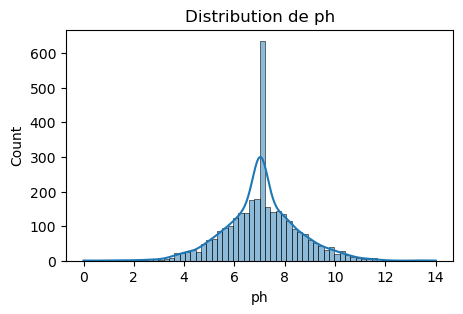

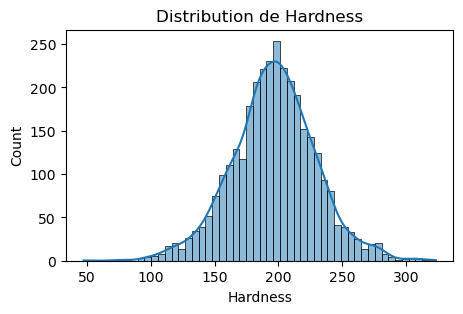

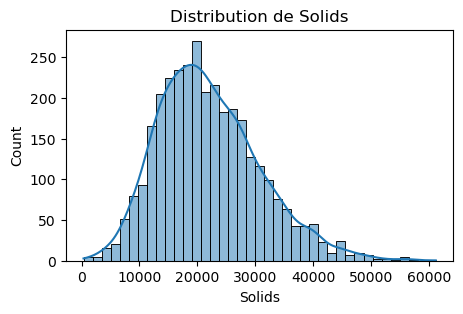

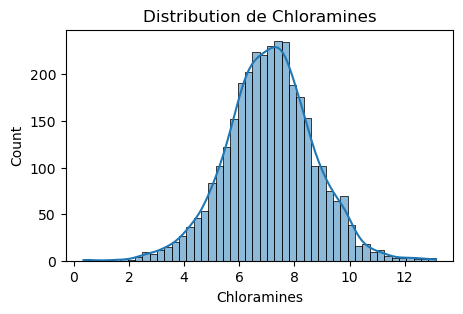

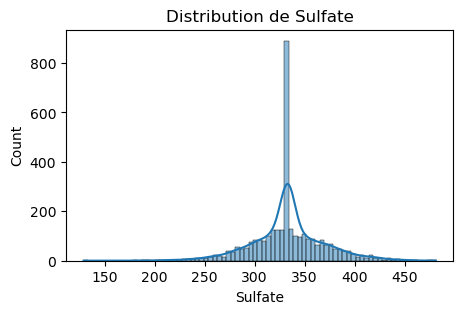

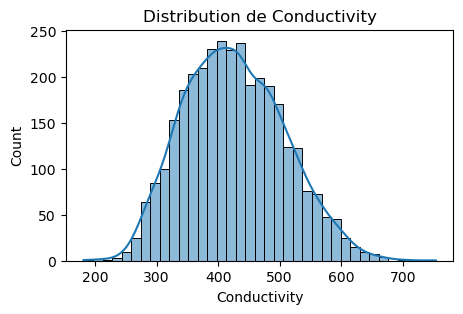

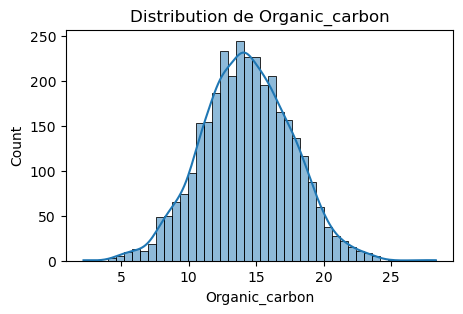

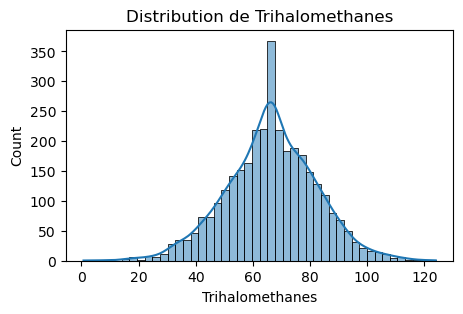

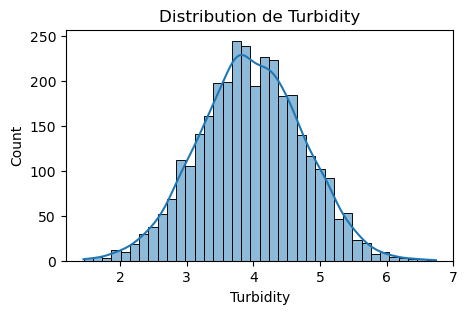

In [16]:
# here we have visualisation des distributions 
for col in df.columns[:-1]:
    plt.figure(figsize=(5,3))
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution de {col}")
    plt.show()


In [17]:
# comparaison potable vs non potable 
df.groupby('Potability').mean()


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
Potability,,,,,,,,,
0,7.077736,196.733292,21777.490788,7.092175,334.200184,426.730454,14.364335,66.308522,3.965800
1,7.068655,195.800744,22383.991018,7.169338,332.683125,425.383800,14.160893,66.533513,3.968328


In [20]:
# here we are just puting hadok les images de graphes heatmap w ge3 dans un folder results 
import os
import matplotlib.pyplot as plt
import seaborn as sns

GRAPHS_DIR = "../results/graphs"  
os.makedirs(GRAPHS_DIR, exist_ok=True)

#  Boxplots + histogrammes pour toutes les colonnes sauf Potability
for col in df.columns[:-1]:
    # Boxplot
    plt.figure(figsize=(5,3))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot {col}")
    plt.savefig(os.path.join(GRAPHS_DIR, f"boxplot_{col}.png"), dpi=300, bbox_inches='tight')
    plt.close()
    
    # Histogramme + KDE
    plt.figure(figsize=(5,3))
    sns.histplot(df[col], kde=True)
    plt.title(f"Histogramme {col}")
    plt.savefig(os.path.join(GRAPHS_DIR, f"hist_{col}.png"), dpi=300, bbox_inches='tight')
    plt.close()

#  Heatmap de corrélation
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Heatmap correlation")
plt.savefig(os.path.join(GRAPHS_DIR, "heatmap_correlation.png"), dpi=300, bbox_inches='tight')
plt.close()




In [21]:
# here on commence letape 3 de pretraitement 
# on doit separer tt dabord les données en x et y 
# X = features (toutes les colonnes sauf Potability)
X = df.drop("Potability", axis=1)
# y = label
y = df["Potability"]


In [22]:
# now pour la normalisation des data we use  standarscalar i think it would help us to do svm et ann 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [23]:
# hna la division des données 20% te3 test et 80% te3 entrainement 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)
# un petit check si tt va bien 
print("Shape X_train:", X_train.shape)
print("Shape X_test :", X_test.shape)
print("Shape y_train:", y_train.shape)
print("Shape y_test :", y_test.shape)


Shape X_train: (2620, 9)
Shape X_test : (656, 9)
Shape y_train: (2620,)
Shape y_test : (656,)
